In [175]:
import numpy as np
import pandas as pd

sample_size = 100
"""분포별로 랜덤하게 값을 만들어줍니다. 
"""
test_dist_dict = {
    "uniform":np.random.randint(1, 100, sample_size),
    "norm_10_5":np.random.normal(10,5, sample_size),
    "norm_0_1":np.random.normal(0,1, sample_size),
    "exp":np.random.exponential(1, sample_size), 
    "poisson":np.random.poisson(10, sample_size)
}
"""append outlier in each columns: max*2
"""
for k in test_dist_dict.keys():
    l = list(test_dist_dict[k])
    l.append(max(l)*2)
    test_dist_dict[k] = np.array(l)
test_dist_df = pd.DataFrame(test_dist_dict)
print("not standardized yet")
print(test_dist_df.head())
print()

"""각 칼럼이 norm(0, 1)을 따른다고 가정하고 standardization해줍니다. 
"""
from sklearn import preprocessing
print("standardized")
new_X = pd.DataFrame(preprocessing.scale(test_dist_df, axis=0), 
                     index=test_dist_df.index,
                     columns=test_dist_df.columns
                    )
print(new_X.head())
print()

print("out of 2 sigma")
print(new_X[ 
    np.logical_or(np.any(new_X >= 2, axis=1), np.any(new_X <= -2, axis=1)) 
])
print()
print("inside of 2 sigma")
print(new_X[ 
    np.logical_and(np.all(new_X <= 2, axis=1), np.all(new_X >= -2, axis=1)) 
].head())

not standardized yet
        exp  norm_0_1  norm_10_5  poisson  uniform
0  3.097040  0.925267  11.764456        7       88
1  1.516744  1.312897  17.350357       11       80
2  1.067566 -0.166201  14.717949       13       82
3  0.209375  1.448831   3.403329       12       82
4  0.522443  0.841368  16.816397        7       82

standardized
        exp  norm_0_1  norm_10_5   poisson   uniform
0  1.735699  1.011912   0.189654 -0.811404  1.153538
1  0.411391  1.400518   1.214113  0.111997  0.885165
2  0.034973 -0.082302   0.731327  0.573697  0.952258
3 -0.684202  1.536793  -1.343784  0.342847  0.952258
4 -0.421846  0.927802   1.116184 -0.811404  0.952258

out of 2 sigma
          exp  norm_0_1  norm_10_5   poisson   uniform
43  -0.172024  0.483546  -0.730286 -2.196504 -1.664376
49   0.932857  2.069857   0.512488  0.342847  0.482606
56  -0.623548  1.154390  -2.714261 -0.118853 -1.765016
65  -0.833061 -0.457480  -2.021482 -0.349704  0.918712
84   3.037033 -0.459161  -0.033519 -0.811404  1.08

In [158]:
np.any(new_X >= 2 , axis=1) + np.any(new_X <= -2 , axis=1)

array([False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True], dtype=bool)

In [162]:
np.logical_and(np.all(new_X <= 2, axis=1), np.all(new_X >= -2, axis=1))

array([ True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False], dtype=bool)

In [139]:
# for you information 

new_X[ np.any(new_X >= 2 , axis=1) + np.any(new_X <= -2 , axis=1) ]

,exp,norm_0_1,norm_10_5,poisson,uniform
13,2.342367,1.412333,0.277622,-1.237774,-0.405686
35,2.599466,0.258386,1.071518,0.121087,1.508394
38,2.701420,-0.226587,1.071981,-0.558344,-1.346505
52,-0.526665,1.500254,-0.012214,2.159377,-0.794991
57,-0.585974,-2.344371,-0.144749,-1.011297,-0.665223
80,2.341152,-0.883064,1.084013,-0.331867,-1.378948
94,-0.817655,2.186664,-0.175075,-0.105390,0.600017
100,6.228608,4.405152,5.567924,6.688912,4.752599


In [140]:
new_X[np.any(new_X >= 2 , axis=1) ]

,exp,norm_0_1,norm_10_5,poisson,uniform
13,2.342367,1.412333,0.277622,-1.237774,-0.405686
35,2.599466,0.258386,1.071518,0.121087,1.508394
38,2.701420,-0.226587,1.071981,-0.558344,-1.346505
52,-0.526665,1.500254,-0.012214,2.159377,-0.794991
80,2.341152,-0.883064,1.084013,-0.331867,-1.378948
94,-0.817655,2.186664,-0.175075,-0.105390,0.600017
100,6.228608,4.405152,5.567924,6.688912,4.752599


In [ ]:
"""test_data를 다 만들었십니다. 
"""

from sklearn import preprocessing

X = test_dist_df
new_X = preprocessing.scale(X)

new_X

In [111]:
"""그럴대는 
"""


array([[-0.10764239,  0.29982909,  0.2319211 , -0.08476214],
       [-0.22765773, -0.55079282, -0.35680169,  0.73391609],
       [-0.71652266, -0.64162173, -0.35680169, -0.94892249],
       [-0.82189146, -0.00380307, -0.74928355, -0.99440462],
       [-0.14949812, -0.89821465, -0.74928355,  0.3700591 ],
       [-0.41746471, -0.83602127, -0.55304262,  0.68843397],
       [ 0.94863824,  0.81922069,  0.2319211 ,  0.02894317],
       [-0.10460001, -0.84031468, -0.16056076, -0.88069931],
       [-0.876401  ,  0.52162569,  0.03568017, -0.5850655 ],
       [-0.31495533, -0.47951239, -0.55304262, -0.81247612],
       [ 2.78799517,  2.60960514,  2.97929413,  2.48497786]])

In [50]:
"""
음, 그냥 계산의 용이성을 위해서 
- 해당 데이터를 특정한 데이터분포의 형태(대부분 normalization의 형태(0, 1))의 형태로 변환
- 무엇을 아웃라이어로 정의할 것이며(변환한다음 2시그마가 넘어가는 것들? ), 어떻게 제외할 것인가? 
- norm(0, 1) 분포를 따를 경우에는 음수 가 존재하기 때문에, 음...아니지. 
    - 음수여도 거리를 계산하는 방식이 유클리디안의 경우는 문제가 없음. 
    - 그러나, jaccard의 경우에는, 음 이 때는 binary 로 변환한 다음에 해야지.  
"""

,exp,norm,poisson,uniform
0,1.082735,0.615850,11,7
1,0.164526,0.887449,7,34
2,0.457974,0.814138,11,21
3,0.868606,0.196098,8,89
4,0.201573,0.556482,12,77


In [98]:
"""
"""
from sklearn import preprocessing

X = test_dist_df
new_X = preprocessing.scale(X)

print(new_X.mean(axis=0))
print(new_X.std(axis=0))

[ -8.79384574e-17   8.79384574e-17  -1.05526149e-16   1.14319995e-16]
[ 1.  1.  1.  1.]


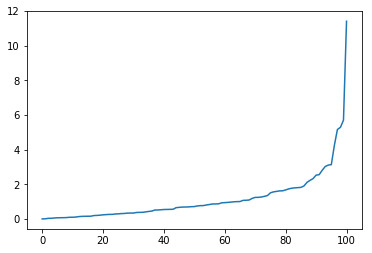

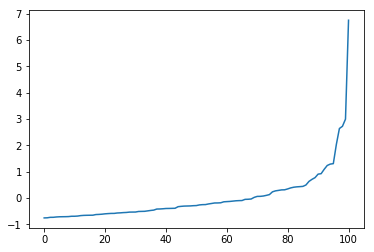

In [97]:
plt.plot(sorted(X['exp']))
plt.show()
plt.plot(sorted(new_X[:, 0]))
plt.show()

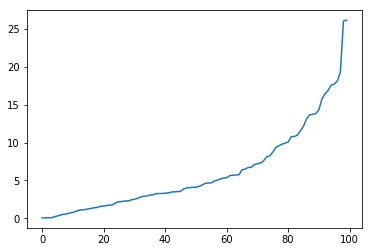

In [76]:
import matplotlib.pyplot as plt
a = sorted(np.random.normal(0, 0.00001, 100))
a = sorted(np.random.exponential(6, 100))
plt.plot(a)
plt.show()

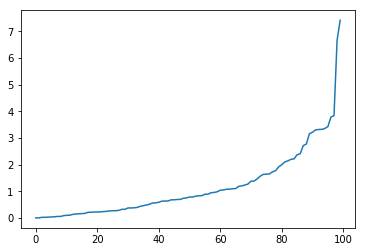

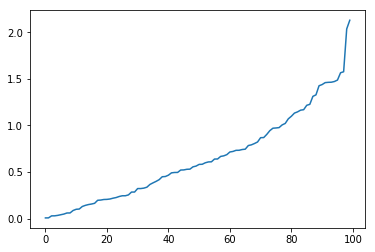

In [107]:
a = sorted(np.random.exponential(1, 100))
plt.plot(a)
plt.show()
a = np.log(list(map(lambda x: x+1, a)))
plt.plot(a)
plt.show()